In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from svm_margin_plot import plot_svm_boundary

In [3]:
df = pd.read_csv('wine_eda.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,1


In [4]:
X = df.drop(labels='quality', axis=1)
y = df['quality']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)
print(f'X_train size: {len(X_train)}', end=', ')
print(f'X_test size: {len(X_test)}')
print(f'y_train size: {len(y_train)}', end=', ')
print(f'y_test size: {len(y_test)}')

X_train size: 6302, X_test size: 195
y_train size: 6302, y_test size: 195


In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
param_grid = {
    'C': np.logspace(-3, 2, 8),
    'kernel': ['poly', 'rbf']
}

In [84]:
estimator_dict = {}
grid_search = GridSearchCV(
    estimator=SVC(class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)   
d = {'SVC': [grid_search.best_score_, grid_search.best_params_, grid_search.best_estimator_]} 
estimator_dict.update(d)
print(estimator_dict)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   16.6s finished


{'SVC': [0.9490659970041413, {'C': 0.001, 'kernel': 'poly'}, SVC(C=0.001, class_weight='balanced', kernel='poly')]}


In [87]:
best_estimator = SVC(C=0.001, class_weight='balanced', kernel='poly').fit(X_train_scaled, y_train)

Accuracy: 0.9128205128205128
              precision    recall  f1-score   support

           0       0.25      0.27      0.26        11
           1       0.96      0.95      0.95       184

    accuracy                           0.91       195
   macro avg       0.60      0.61      0.61       195
weighted avg       0.92      0.91      0.91       195



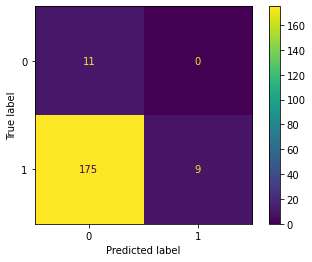

In [88]:
y_pred = best_estimator.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(classification_report(y_true=y_test, y_pred=y_pred))
plot_confusion_matrix(
    estimator=best_estimator,
    X=X_test,
    y_true=y_test
);

Accuracy: 0.96229028782515
              precision    recall  f1-score   support

           0       0.67      0.01      0.02       246
           1       0.96      1.00      0.98      6251

    accuracy                           0.96      6497
   macro avg       0.81      0.50      0.50      6497
weighted avg       0.95      0.96      0.94      6497



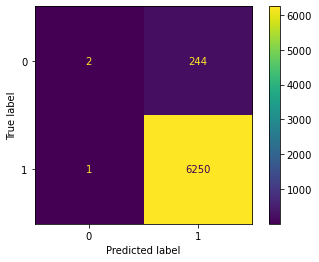

In [89]:
final_model = best_estimator.fit(X, y)
y_hat = best_estimator.predict(X)
print(f'Accuracy: {accuracy_score(y_true=y, y_pred=y_hat)}')
print(classification_report(y_true=y, y_pred=y_hat))
plot_confusion_matrix(
    estimator=final_model,
    X=X,
    y_true=y
);

In [90]:
df['Predicted'] = y_hat
missed = df[df['quality'] != df['Predicted']].index
df.iloc[missed]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Predicted
18,7.4,0.590,0.08,4.40,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,0,1,1
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,0,1,1
41,8.8,0.610,0.30,2.80,0.088,17.0,46.0,0.99760,3.26,0.51,9.3,0,1,1
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,0,1,1
73,8.3,0.675,0.26,2.10,0.084,11.0,43.0,0.99760,3.31,0.53,9.2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,7.1,0.240,0.34,1.20,0.045,6.0,132.0,0.99132,3.16,0.46,11.2,0,0,1
6378,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.9,0,0,1
6403,6.0,0.350,0.46,0.90,0.033,9.0,65.0,0.98934,3.24,0.35,12.1,0,0,1
6438,5.2,0.405,0.15,1.45,0.038,10.0,44.0,0.99125,3.52,0.40,11.6,0,0,1
